<a href="https://colab.research.google.com/github/S-AILAB/Data-Viz-on-IBM-Employee-Attrition/blob/main/Data_Visualiszation_on_IBM_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Visualiszation on IBM Employee Attrition**
**Problem Statement:** Uncover the factors that lead to Employee Attrition and explore the reasons as to why people are leaving the organtization.
**Tasks to be Performed:**
1. What is the distribution of the **Age & Monthly Income** column in the data?
2. Which department of the company has highest attrition rate?
3. How does the monthly income affect the attrition rate?
4. Which employees are more likely to leave? Senior employees with higher monthly income or Recent Joiners with  low monthly income.
5. Are Employees in a particular **Job Role** more likely to quit?
6. Analyze the monthly income of employees in various departments such as **Sales, Research & Development and Human Research**.
7. Analyze the impact of age on the monthly income of employees

# **Importing libraries**

In [58]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [59]:
!wget https://www.dropbox.com/s/53xyievbdpr7bl0/IBM.csv

--2024-09-05 13:17:12--  https://www.dropbox.com/s/53xyievbdpr7bl0/IBM.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/g360uf54my9fcozzuahsl/IBM.csv?rlkey=s06a8i0hs31mgnfhq9zr886ei [following]
--2024-09-05 13:17:12--  https://www.dropbox.com/scl/fi/g360uf54my9fcozzuahsl/IBM.csv?rlkey=s06a8i0hs31mgnfhq9zr886ei
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca65b01efc5534206f61b1cb54d.dl.dropboxusercontent.com/cd/0/inline/CZ9fvnuNi6KgYAopgkl0lFXcMrNhcpgNOgJLzsPdCRbYN0HIbhFjb4BqfI7KVEDgTV1Sbabk-6d8TP0eBunVPfXl7s4bMY-eP8kVs9m5PK6KrARENk9Bs3bZVINXAszx0UHOuHiu0-Aw-cw_KuhRytB-/file# [following]
--2024-09-05 13:17:13--  https://uca65b01efc5534206f61b1cb54d.dl.dropboxusercontent.com/cd/0/inline/CZ9fvnuNi6KgYAop

Reading CSV

In [60]:
df =pd.read_csv('IBM.csv')
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [62]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Univariate Distributions
It is a probablitiy distribution of only one random variable.

 What is the distribution of the **Age & Monthly Income** column in the data?

 We will use Histogram

In [63]:
df['Age'].min(), df['Age'].max()

(18, 60)

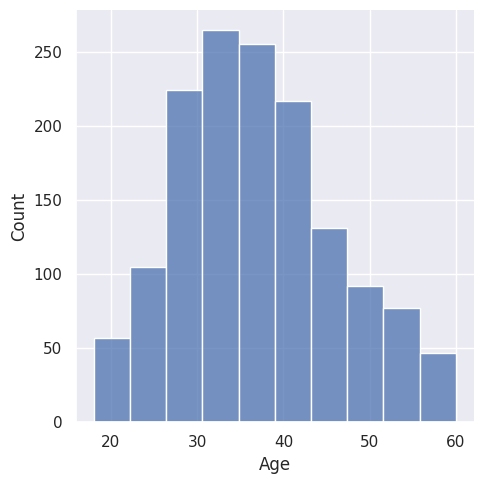

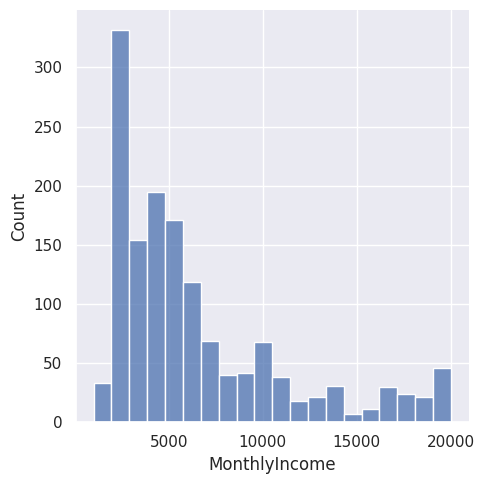

In [64]:
sns.set()
sns.displot(df['Age'], kde=False,bins=10)
sns.displot(df['MonthlyIncome'], kde=False)

# Count Plot


*   What's the attrition percentage in the company?
*   Which department of the company has highest attrition rate?

In [65]:
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

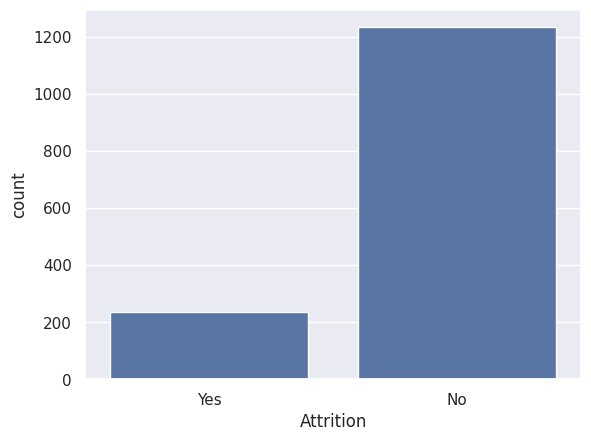

In [66]:
ax = sns.countplot(x='Attrition', data=df)


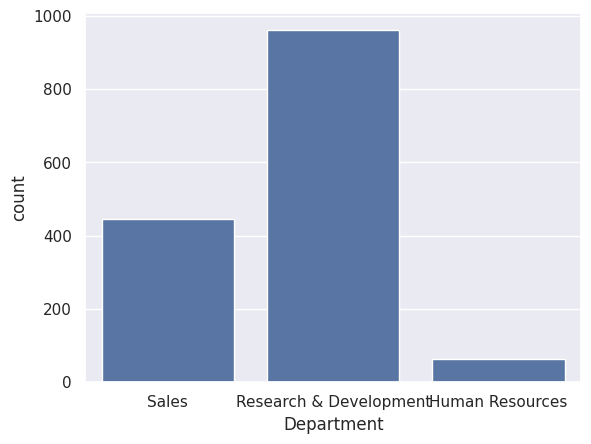

In [67]:
ax = sns.countplot(x='Department', data=df)

In [68]:
# ax = sns.countplot(x='JobRole', data=df, color='orange')

In [69]:
ayes = round((df[df['Attrition'] == 'Yes']['Attrition'].count())*100/(len(df)),2)
ano = round((df[df['Attrition'] == 'No']['Attrition'].count())*100/(len(df)),2)
print(f'Yes: {ayes}%\n No: {ano}%')

Yes: 16.12%
 No: 83.88%


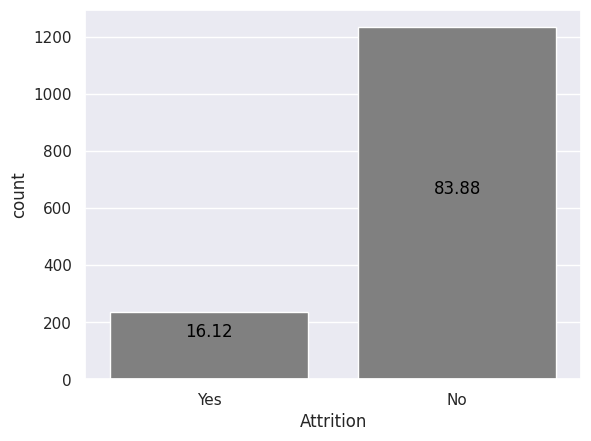

In [70]:
ax = sns.countplot(x='Attrition', data=df, color = 'grey' )
ax.text (0,150, ayes, color = 'black', ha = "center") #0= 1st bar, 150 is the value at which you need the ayes percentage to be printed
ax.text (1,650, ano, color = 'black', ha = "center")
plt.show()

# Bar Plot


*   How does the monthly income affect the attrition rate?
*   Which gender is most likely to leave?
*   Does distance from affect the attrition rate?






<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

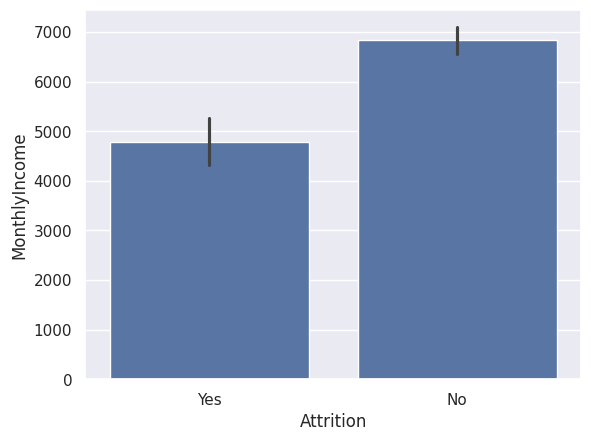

In [71]:
sns.barplot(x='Attrition', y='MonthlyIncome', data=df)

In [72]:
new_df = df['Gender'].groupby(df['Attrition']).value_counts(normalize = True).rename('Percentage of Group').reset_index()
new_df

,Attrition,Gender,Percentage of Group
0,No,Male,0.593674
1,No,Female,0.406326
2,Yes,Male,0.632911
3,Yes,Female,0.367089


Attrition = No:

Male: 59.37% of the employees who did not leave the company are male.
Female: 40.63% of the employees who did not leave the company are female.
Attrition = Yes:

Male: 63.29% of the employees who left the company are male.
Female: 36.71% of the employees who left the company are female.


1. The percentages show that in both groups (those who stayed and those who left), males constitute a larger proportion than females.
2. The proportion of males is slightly higher among those who left the company compared to those who stayed (63.29% vs. 59.37%).
3. Similarly, the proportion of females is slightly higher among those who stayed compared to those who left (40.63% vs. 36.71%).

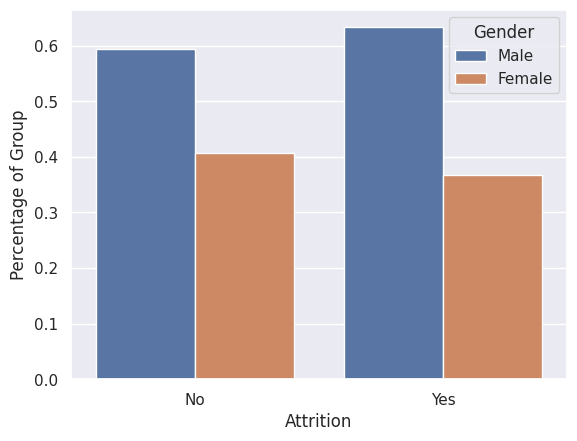

In [73]:
ax = sns.barplot(x='Attrition', y='Percentage of Group', data=new_df, hue = 'Gender')
vals = ax.get_yticks() # get the values of Y

# Scattered Plot
Which employees are more likely to leave? Senior employees with higher monthly income or Recent Joiners with low monthly income.Does the year spent at the company affect Attrition?


In [74]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

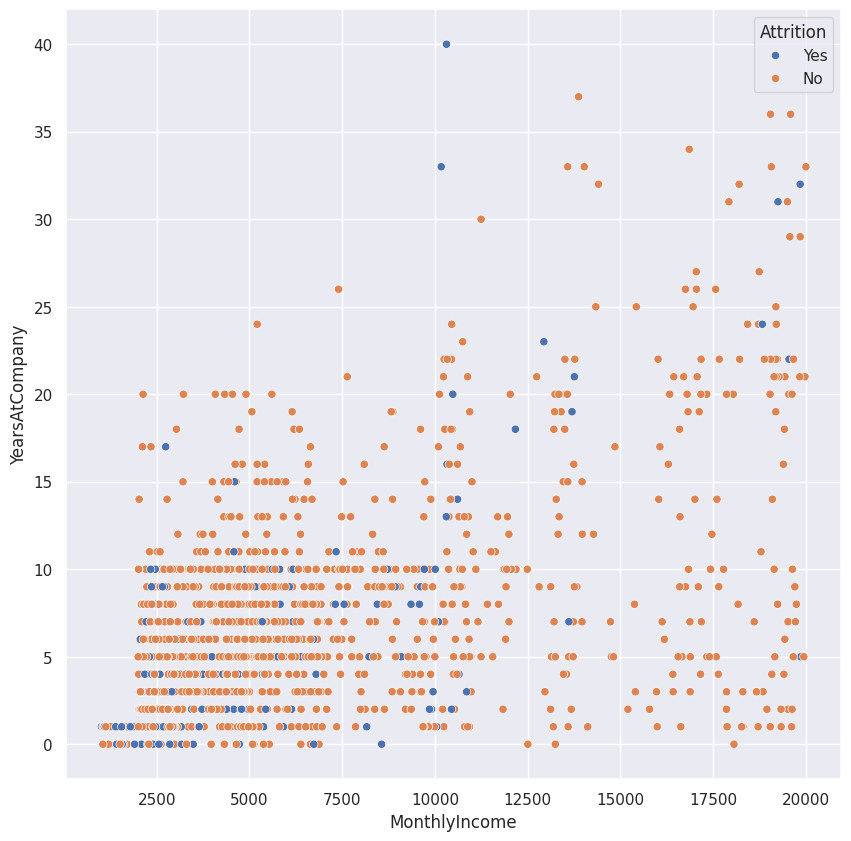

In [75]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='MonthlyIncome', y='YearsAtCompany', data=df, hue='Attrition')
plt.show()

# Swarm plot
swarm plots are type of scatter plots with axis representing categorical variable and the other one representing numerical variable.



*   Are Employees in a particular Job Role more likely to quit?
*   Does Job Level of the employees influences the attrition rate?



<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

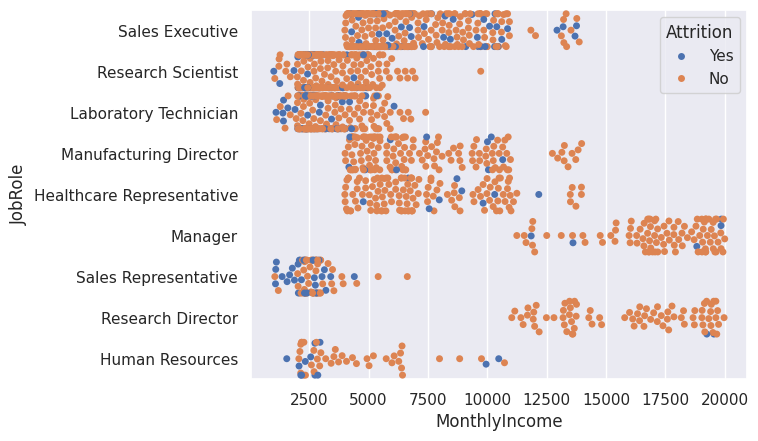

In [76]:
sns.swarmplot(x='MonthlyIncome', y='JobRole', data=df, hue='Attrition')
# to save this as a jpg file
#plt.savefig('swarm.jpg')

Analysis:
At lower level of Monthly Income there is high level of attrition in JobRoles- Sales Representative, Laboratory Technician and HR.

<Axes: xlabel='JobLevel', ylabel='MonthlyIncome'>

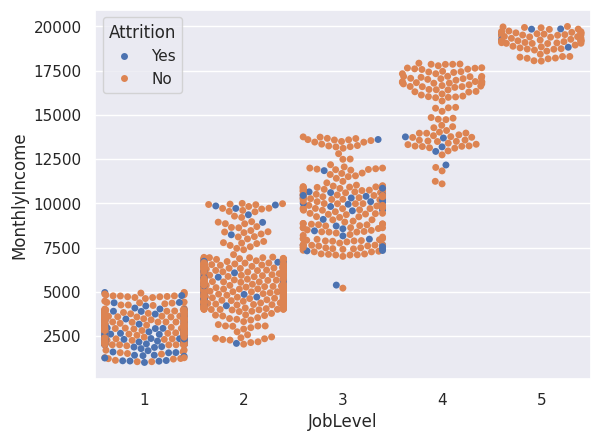

In [77]:
sns.swarmplot(x='JobLevel', y='MonthlyIncome', data=df, hue='Attrition')

Analysis:
The output show that there is more attrition at Job Level 1 where the Monthly Income is low.
Further the attrition can be seen at Job Level 3 in the Monthly Income Level between 7500 to 15000

#Box Plot


*   Analyze the monthly income of employees in various departments such as Sales, Research & Development and Human Research.



<Axes: xlabel='Department', ylabel='MonthlyIncome'>

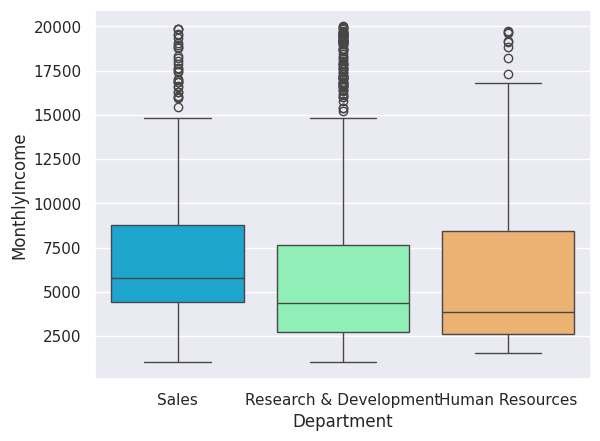

In [78]:
sns.boxplot(x='Department', y='MonthlyIncome', data=df, palette='rainbow')

Analysis:
The mean monthly income of the Sales is comparatively higher than the R&D Dpt. and HR

# Joint Plot


*   Analyze the impact of age on the monthly income of employees




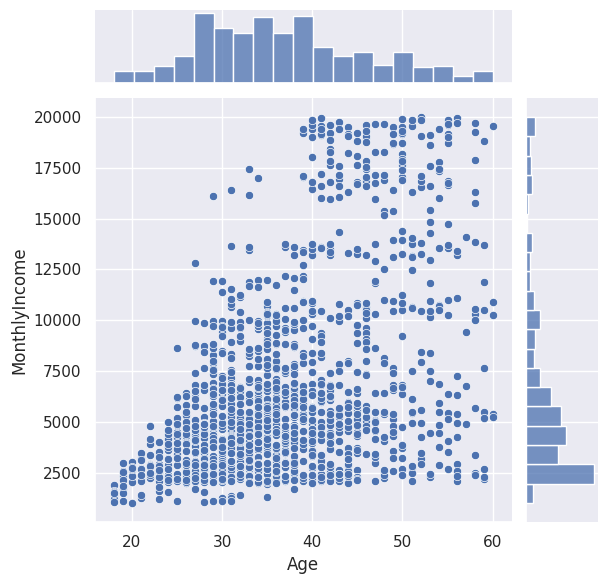

In [79]:
sns.jointplot(x='Age', y='MonthlyIncome', data=df, kind='scatter')